## keras 및 파이썬에 대해 알고 가기

#### Optimizer(최적화기)
- 손실함수(loss function)이 예측값과 실제값의 오차를 구함.
- 오차를 줄이기 위해 가중치 및 편향값 업데이트 함(경사하강법)

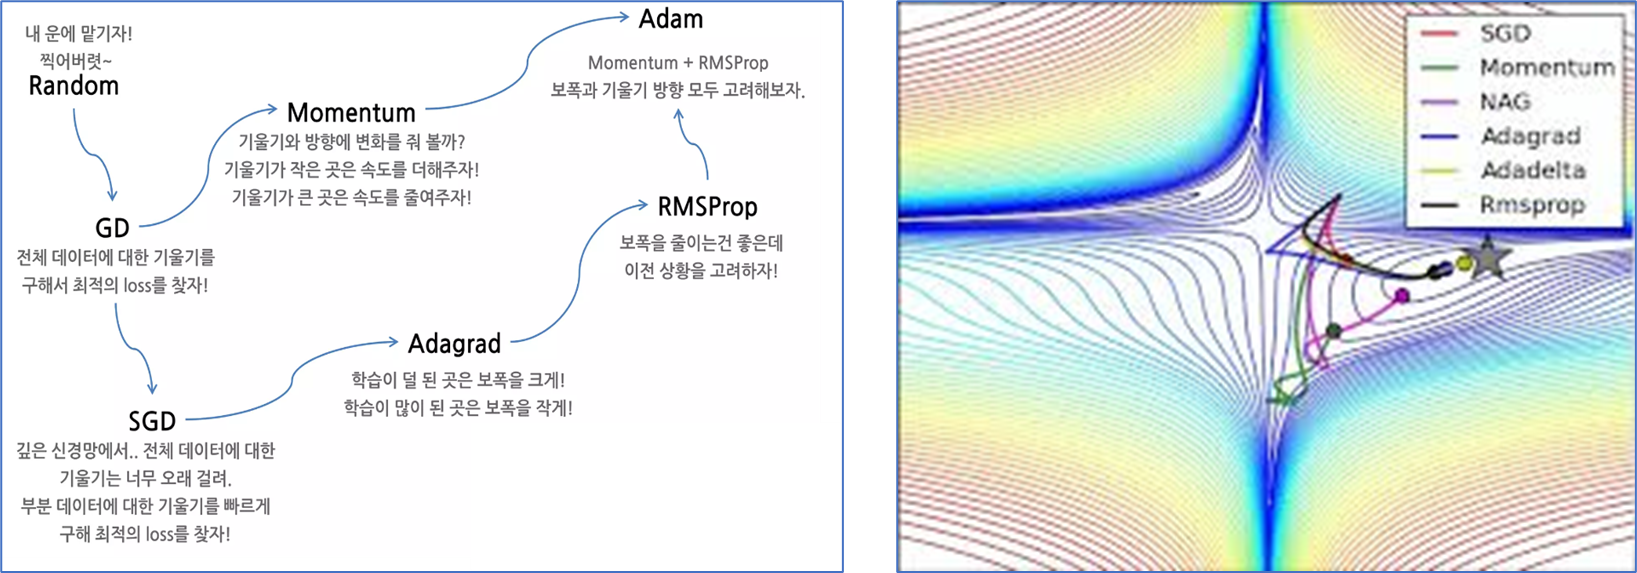

### 파이썬 함수의 Default Parameter

In [ ]:
# 일반적인 매개변수
def func1(name, age, school) :
    print(name, age, school)

func1("홍길동", 17, "충남과학고")
#func1("홍길동", 17) # 오류

In [ ]:
# 디폴트 매개변수 사용
def func2(name, age, school="충남과학고") :
    print(name, age, school)

func2("홍길동", 17, "충남과학고")
func2("홍길동", 17) # 오류 아님
func2("홍길동", "충곽")

Keras에서의 예

```
model.add(keras.layers.Dense(32, activation='relu'))    # 위 예시 중 사용했던 fit() 함수 호출 코드

# Dense() 함수 :
keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    lora_rank=None,
    **kwargs
)
```

```
model.fit(X, Y, epochs=1000)   # 위 예시 중 사용했던 fit() 함수 호출 코드

# fit() 함수 :
Model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
)
```

### 파이썬 객체지향 프로그래밍 기법(OOP : Object-Oriented Programming)

- 객체지향프로그래밍(객체 : 값(속성), 기능(메서드 함수))

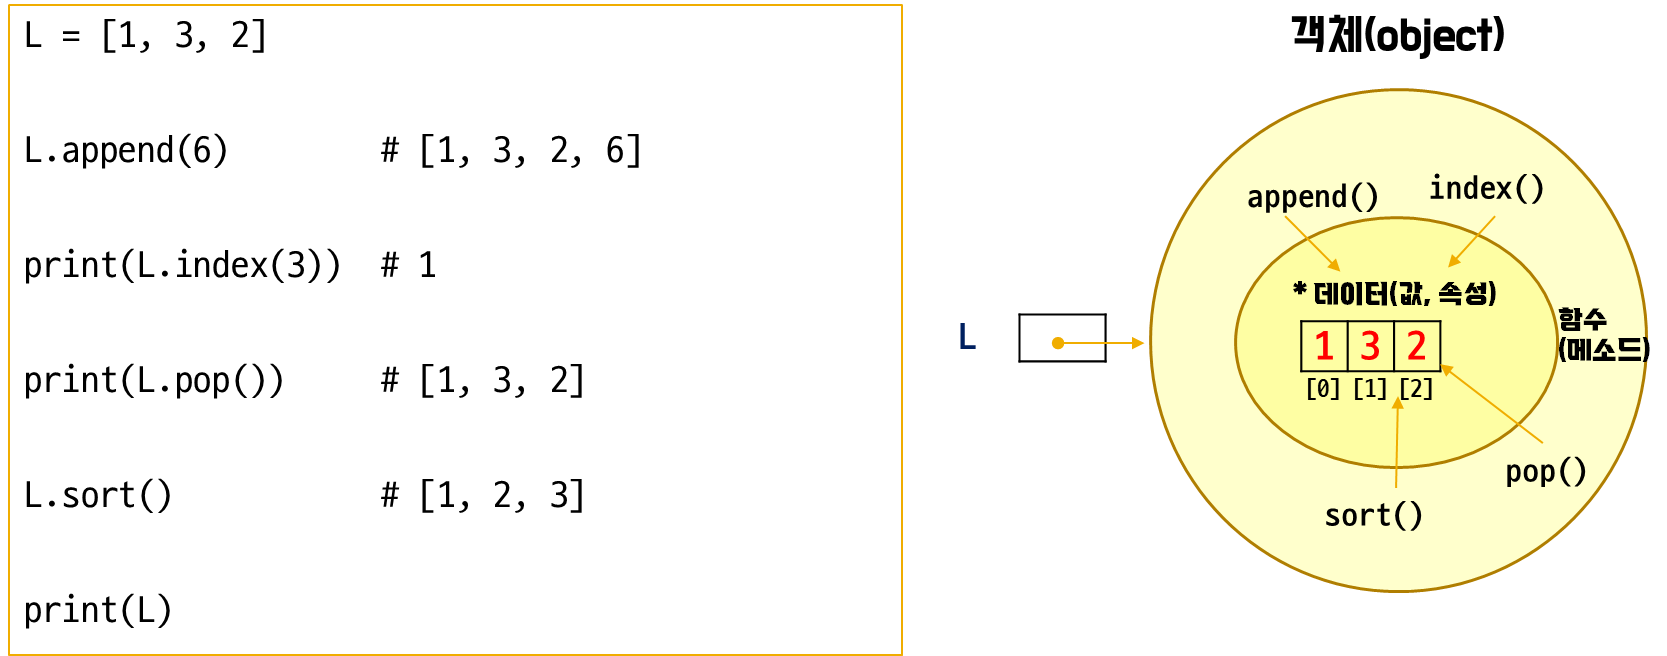

In [ ]:
class Student :
    def __init__(self):
        self.name = ""
        self.hp = 0
        #print("객체 생성")

    def walking(self):
        # 걷기를 하면 hp가 10 증가
        print(f"{self.name}님이 걷기 운동을 해서 hp가 {self.hp}이 됨.")


    def running(self):
        # 뛰기를 하면 hp가 10 증가
        print(f"{self.name}님이 뛰기 운동을 해서 hp가 {self.hp}이 됨.")

hong = Student()
lee = Student()

hong.name = "홍길동"
lee.name = "이영희"

In [ ]:
# hong 객체의 running() 메서드 실행



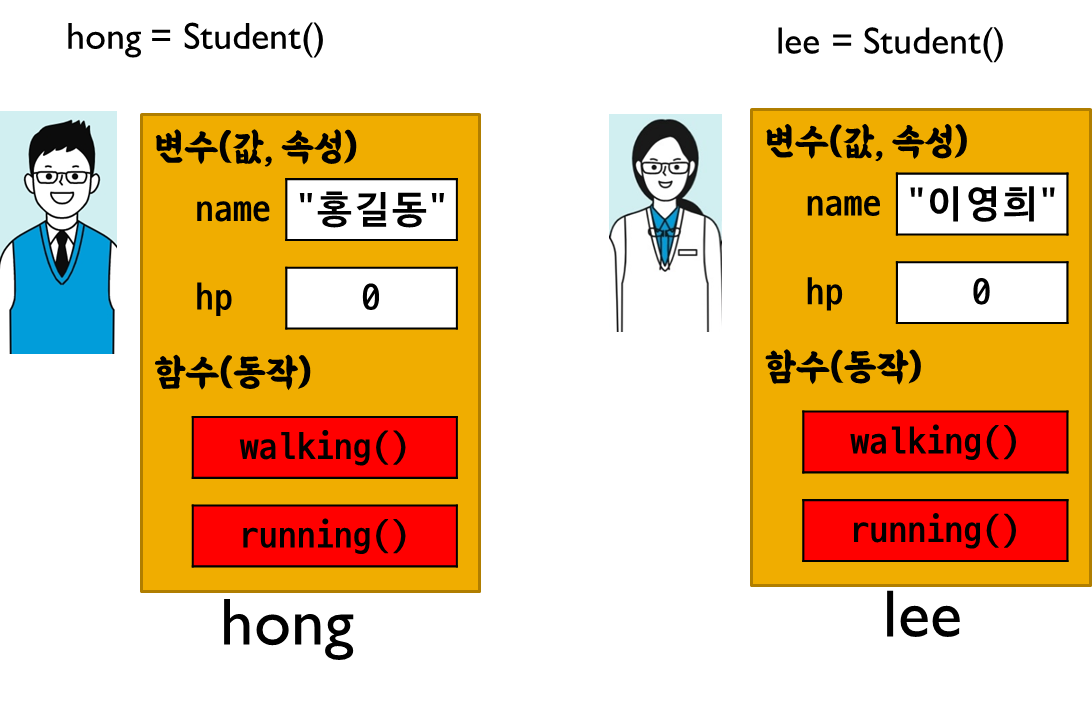

## 문제 유형에 따른 (은닉층, 출력층)활성화 함수 및 손실함수

지도학습
- 회귀 - "연속적인 값"
  > 은닉층 활성화 함수 : ```relu```  
  > 출력층 활성화 함수 : ```linear``` 혹은 쓰지 않음  
  > 손실함수 : ```mse ```

- 분류 - 범주형 값
 - 이진분류 : 남/여, 양성/음성, 정상/비정상, 합격/불합격 등
   > 은닉층 활성화 함수 : ```relu```  
   > 출력층 활성화 함수 : ```sigmoid```  
   > 손실함수 : ```binary_crossentropy```

 - 다중분류 : 개/고양이/코끼리
   > 은닉층 활성화 함수 : ```relu```  
   > 출력층 활성화 함수 : ```softmax```  
   > 손실함수 : ```categorical_crossentropy```, ```sparse_categorical_crossentropy```  


# 이진 분류 모델의 개발

## 분류모델 : 와인의 종류 예측(화이트와인 or 레드와인)

In [ ]:
# 0. 필요한 모듈을 import한다.
import numpy as np
import pandas as pd
import keras

In [ ]:
# 1. 데이터를 준비한다.
# "https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/wine_header.csv" 데이터를 불러온다.
wine = pd.read_csv(???)

In [ ]:
### 처음 5행 보기



In [ ]:
# wine 데이터프레임의 모든 컬럼 출력

???

In [ ]:
# 독립변수와 종속변수 분리하기

X = ???
Y = ???

In [ ]:
X

In [ ]:
Y

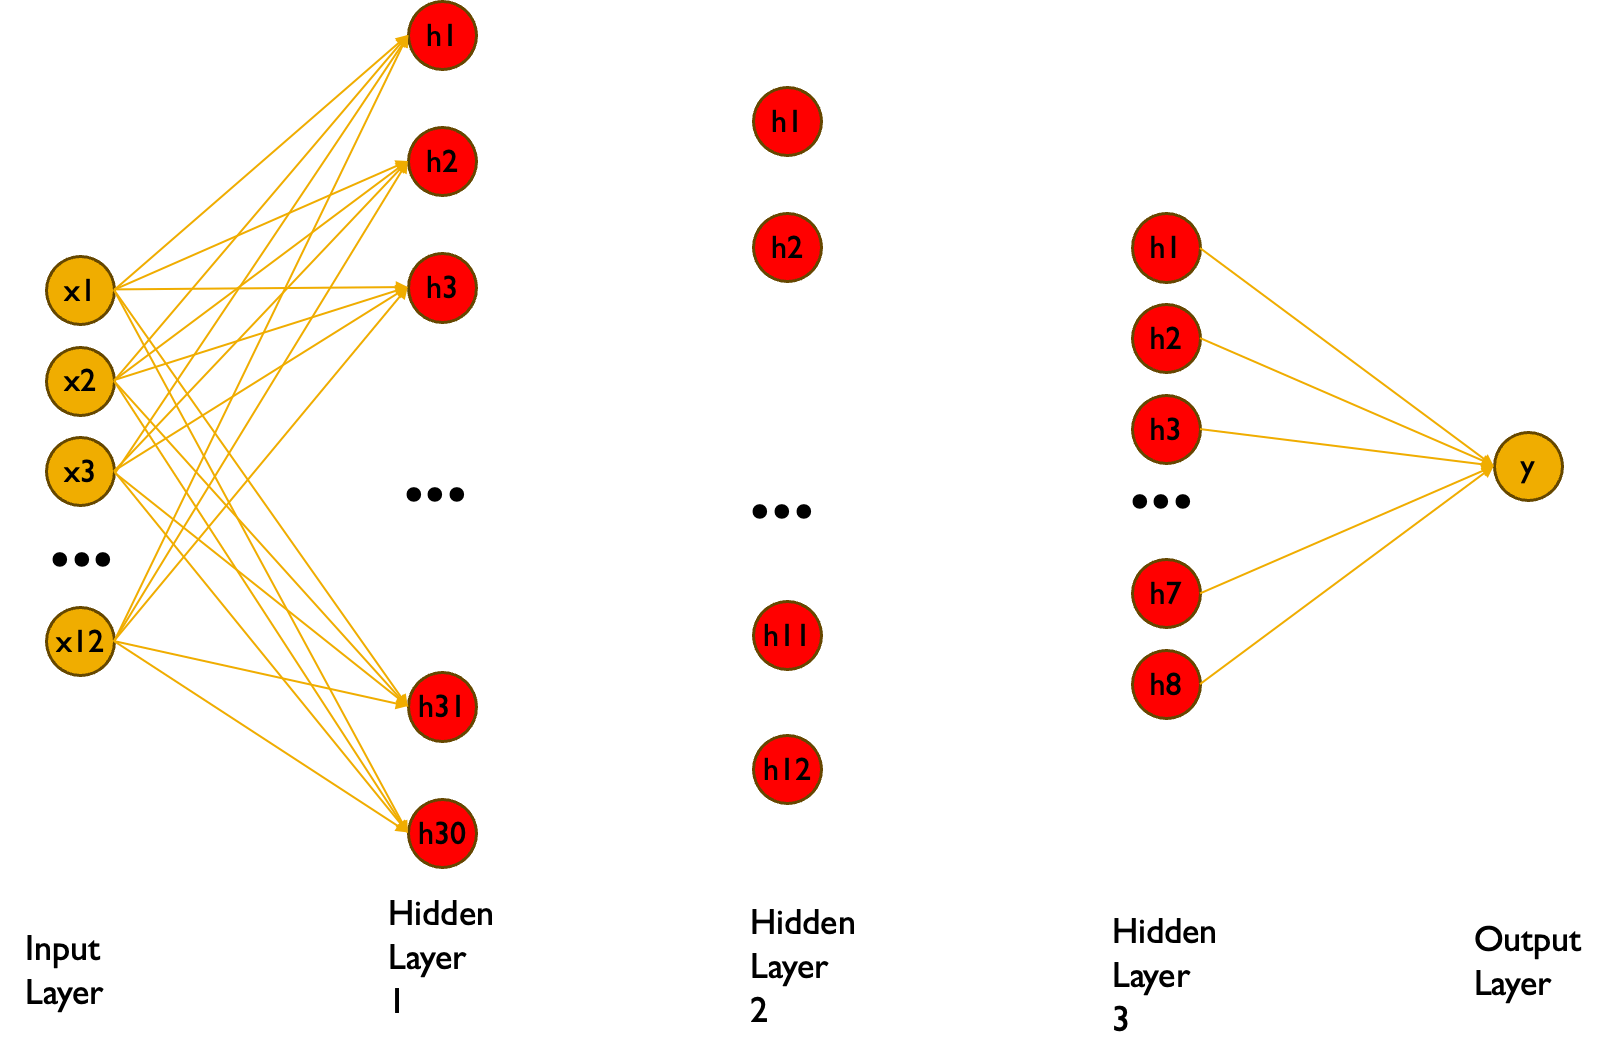

## 전체 데이터로 학습시키기

In [ ]:
# 0. 필요한 모듈을 import한다.
import numpy as np
import pandas as pd
import keras


# 1. 데이터를 준비한다.
wine = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/wine_header.csv")

X = wine[['주석산_농도', '아세트산_농도', '구연산_농도', '잔류당분_농도', '염화나트륨_농도', '유리아황산_농도', '총_아황산_농도', '밀도', 'pH', '황산칼륨_농도', '알코올_도수', '와인맛_등급']]
Y = wine['종류(0W1R)']


# 2. 모델의 구조를 설계한다.
model = keras.Sequential()
model.add(keras.layers.Input(shape=(??, )))
model.add(keras.layers.Dense(??, activation=??))
model.add(keras.layers.Dense(??, activation=??))
model.add(keras.layers.Dense(??, activation=??))
model.add(keras.layers.Dense(??, activation=??))


# 3. 모델의 학습을 설정한다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['???']) # metrics: 모델의 평가 지표 설정(정확도, accuracy)


# 4. 모델을 학습시킨다.
# 전체 데이터로 학습시키기
hist = model.fit(X, Y, epochs=100)

## 학습데이터와 테스트 데이터 분리하기
- train_data : 온전히 학습만을 위해 사용

- validation_data : 학습에는 관여하지 않음, 과적합 등 판단의 용도

- test_data : 학습에는 관여하지 않음, 최종적으로 모델의 성능을 판단

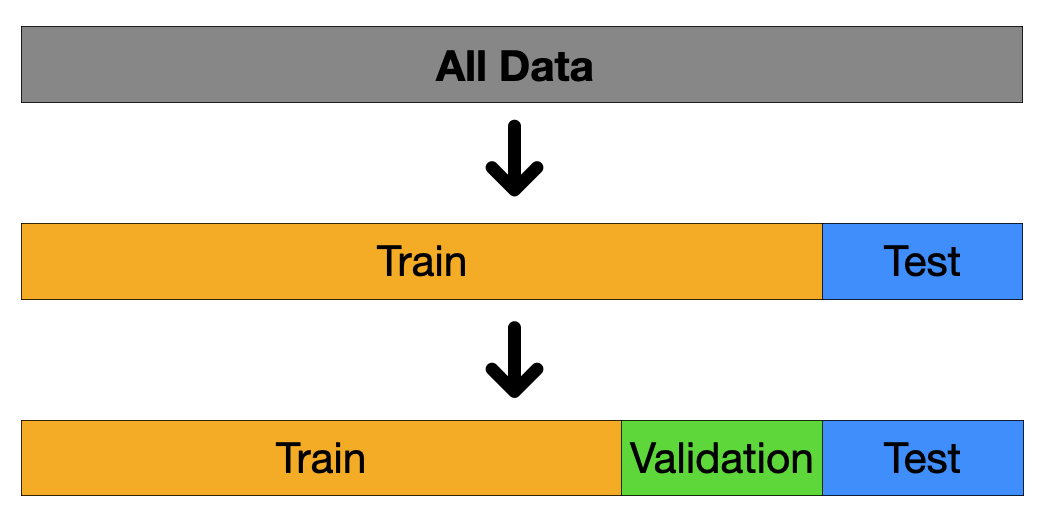

In [ ]:
# 전체 데이터 --> train과 test로 분리하기(70% : 30%)

from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, shuffle=True)

In [ ]:
# 훈련 데이터의 독립변수 보기

train_X

In [ ]:
# 훈련 데이터의 종속변수 보기

train_Y

In [ ]:
# 테스트 데이터의 독립변수 보기

test_X

In [ ]:
# 테스트 데이터의 종속변수 보기

test_Y

## 훈련 데이터(train data)만 사용해 학습시키기

In [ ]:
# 0. 필요한 모듈을 import한다.
import numpy as np
import pandas as pd
import keras


# 1. 데이터를 준비한다.
wine = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/wine_header.csv")

X = wine[['주석산_농도', '아세트산_농도', '구연산_농도', '잔류당분_농도', '염화나트륨_농도', '유리아황산_농도', '총_아황산_농도', '밀도', 'pH', '황산칼륨_농도', '알코올_도수', '와인맛_등급']]
Y = wine['종류(0W1R)']


# 2. 모델의 구조를 설계한다.
model = keras.Sequential()
model.add(keras.layers.Input(shape=(12, )))
model.add(keras.layers.Dense(30, 'relu'))
model.add(keras.layers.Dense(12, 'relu'))
model.add(keras.layers.Dense(8, 'relu'))
model.add(keras.layers.Dense(1, 'sigmoid'))


# 3. 모델의 학습을 설정한다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # metrics: 모델의 평가 지표 설정(정확도)


# 4. 모델을 학습시킨다.
hist = model.fit(???, ???, epochs=100)

In [ ]:
# 테스트 데이터를 활용해 모델 평가하기

score = model.evaluate(???, ???)

## 학습 데이터 중 20%를 검증데이터로 사용하여 학습시키기(학습과정 살펴보기)

In [ ]:
# 0. 필요한 모듈을 import한다.
import numpy as np
import pandas as pd
import keras


# 1. 데이터를 준비한다.
wine = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/wine_header.csv")

X = wine[['주석산_농도', '아세트산_농도', '구연산_농도', '잔류당분_농도', '염화나트륨_농도', '유리아황산_농도', '총_아황산_농도', '밀도', 'pH', '황산칼륨_농도', '알코올_도수', '와인맛_등급']]
Y = wine['종류(0W1R)']


# 2. 모델의 구조를 설계한다.
model = keras.Sequential()
model.add(keras.layers.Input(shape=(12, )))
model.add(keras.layers.Dense(30, 'relu'))
model.add(keras.layers.Dense(12, 'relu'))
model.add(keras.layers.Dense(8, 'relu'))
model.add(keras.layers.Dense(1, 'sigmoid'))


# 3. 모델의 학습을 설정한다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # metrics: 모델의 평가 지표 설정(정확도)


# 4. 모델을 학습시킨다.
hist = model.fit(train_X, train_Y, epochs=100, ??????)

## 학습 이력 데이터 살펴보기


```
hist = model.fit(train_X, train_Y, epochs=100, validation_split=0.2)
```



```
hist.history
```



In [ ]:
# 학습이력 보기

hist.history

history 객체는 다음과 같은 키(key)를 가지고 있습니다.

```
loss: 훈련 데이터에 대한 손실값         : hist.history['loss']
val_loss: 검증 데이터에 대한 손실값     : hist.history['val_loss']
accuracy: 훈련 데이터에 대한 정확도     : hist.history['accuracy']
val_accuracy: 검증 데이터에 대한 정확도 : hist.history['val_accuracy']
```



In [ ]:
# train_data의 오차와 정확도
hist.history['loss']
hist.history['accuracy']

# validation_data의 오차와 정확도
hist.history['val_loss']
hist.history['val_accuracy']

## 학습 진행과정 시각화 하기

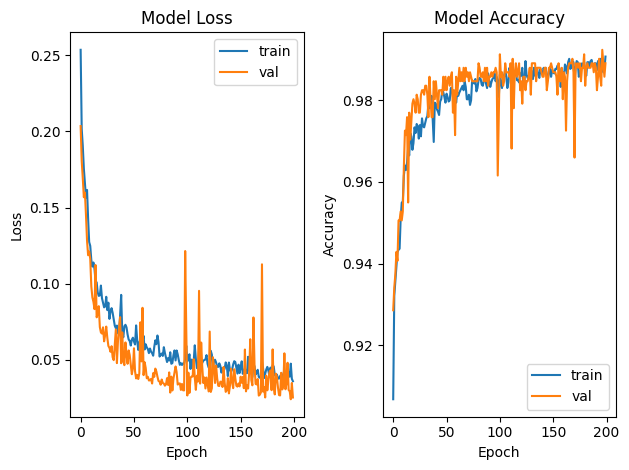

In [ ]:
import matplotlib.pyplot as plt

# 훈련 손실 그래프
plt.subplot(121)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

# 훈련 정확도 그래프
plt.subplot(122)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right') # 범례
plt.tight_layout()

plt.show()

## 오버피팅(일반화 되지 않은 경우)

In [ ]:
# 0. 필요한 모듈을 import한다.
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split

# 1. 데이터를 준비한다.
df = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/sonar3.csv", header=None)

X = df.iloc[:, 0:60]
Y = df.iloc[:, 60]

# 훈련데이터와 테스트 데이터 분리하기
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, shuffle=True)


# 2. 모델의 구조를 설계한다.
model = keras.Sequential()
model.add(keras.layers.Input(shape=(60, )))
model.add(keras.layers.Dense(24, 'relu'))
model.add(keras.layers.Dense(10, 'relu'))
model.add(keras.layers.Dense(1, 'sigmoid'))


# 3. 모델의 학습을 설정한다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델을 학습시킨다.
hist = model.fit(train_X, train_Y, epochs=500, validation_split=0.2)

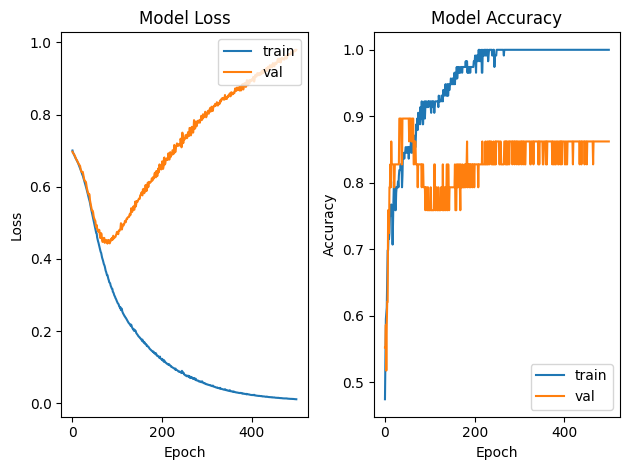

In [ ]:
import matplotlib.pyplot as plt

# 훈련 손실 그래프
plt.subplot(121)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

# 훈련 정확도 그래프
plt.subplot(122)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right') # 범례
plt.tight_layout()

plt.show()

In [ ]:
model.evaluate(test_X, test_Y)

2/2 [==============================] - 0s 10ms/step - loss: 0.9777 - accuracy: 0.8254


[0.9777402281761169, 0.8253968358039856]

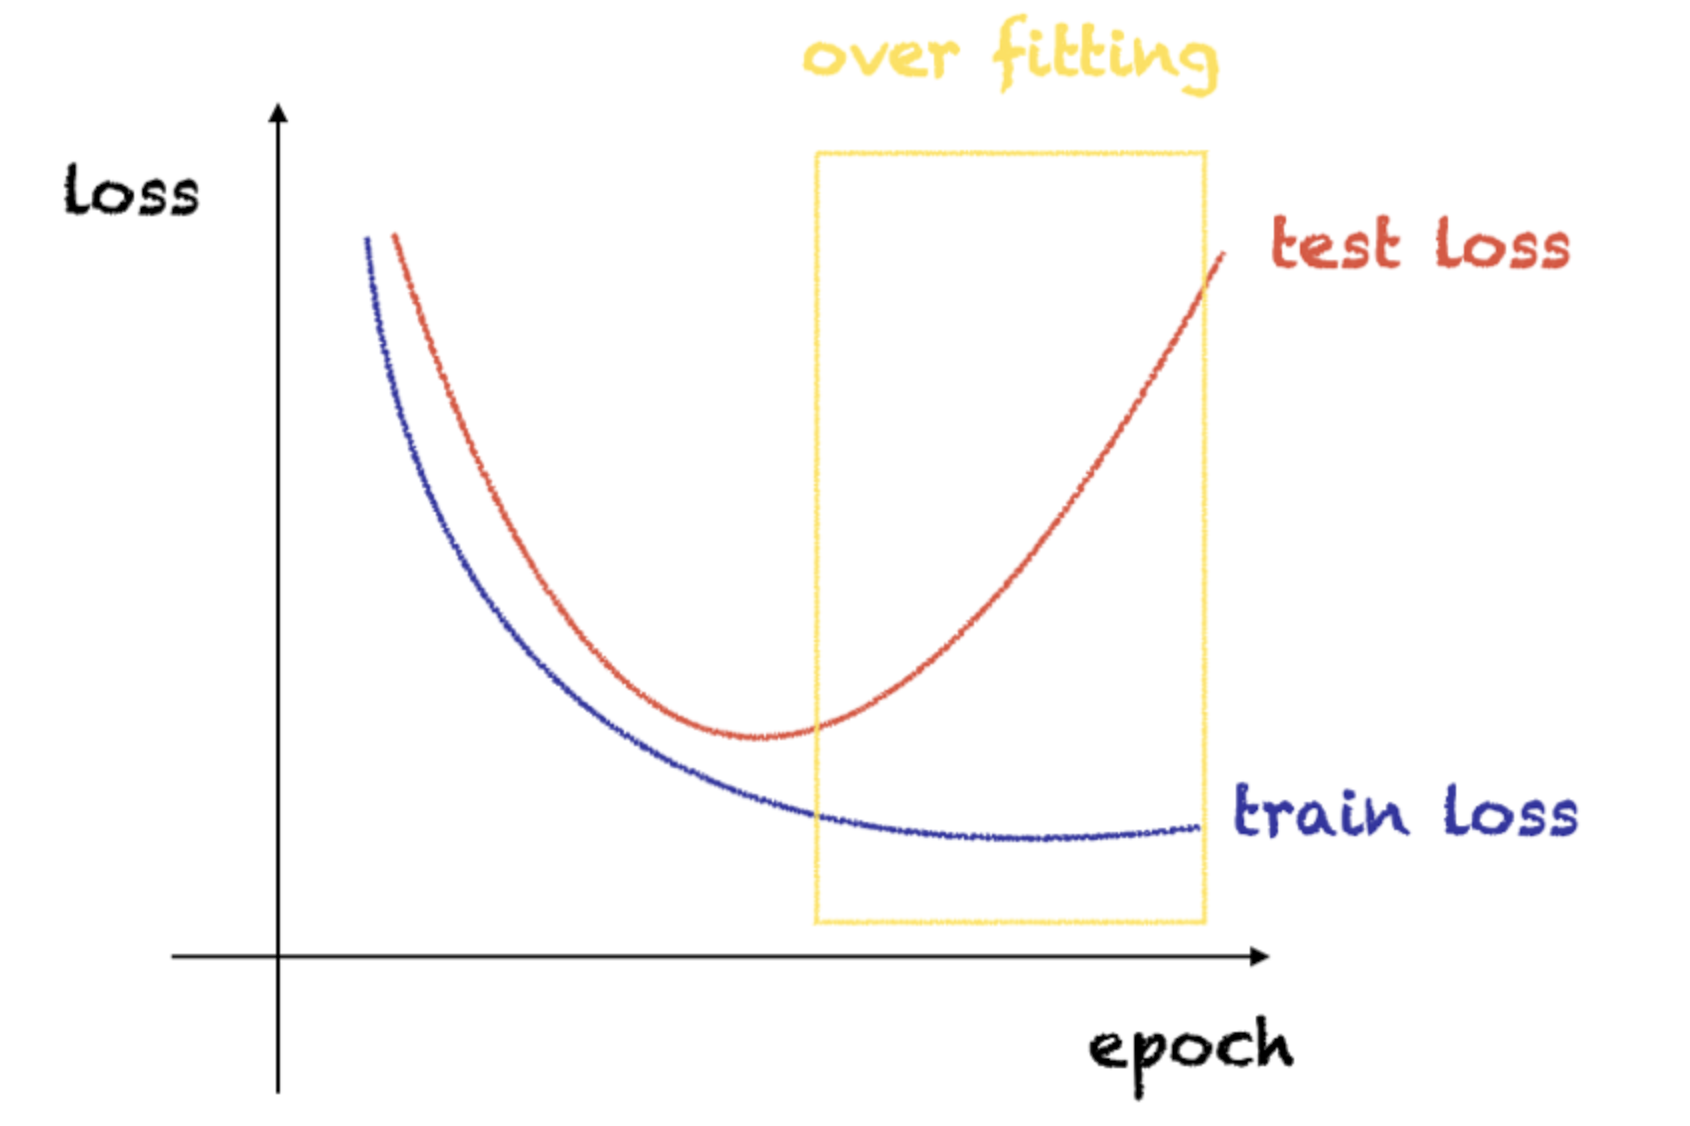

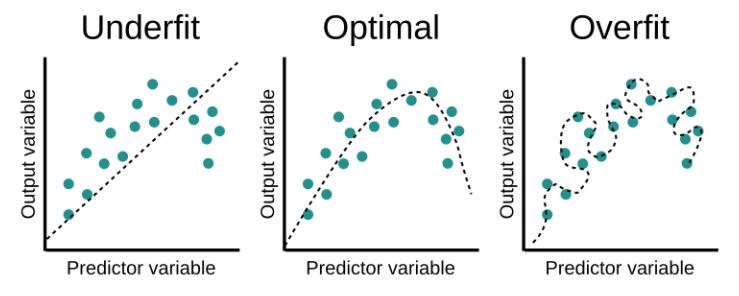